In [4]:
!pip install ipywidgets widgetsnbextension numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


In this worksheet we analayse the Fourier transforms of signals. A fourier transform breaks a signal down into its frequency components so that you can do all sorts of things to it. For example, if we can calculate how a sine wave performs in a specific system that is all we need to know to know how a square wave would act in the same system since a square wave can be made up of sine waves. Let's try making a square wave out of sine waves first:

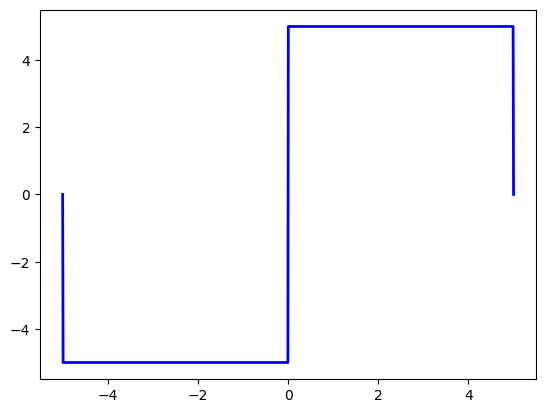

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def squareWave(x):
    if (x > 0 and x < 5):
        return 5
    elif (x <= 0 and x >= -5):
        return -5
    return 0

x_range = np.linspace(-5.001, 5, 1000)
squareWaveVec = np.vectorize(squareWave)
y = squareWaveVec(x_range)

plt.plot(x_range, y, color='blue', linewidth=2)
plt.show()

The concept of a Fourier transform for a peiodic signal is quite simple. To find out how much of a sine wave of a certain frequency a signal contains we simply integrate it multiplied by the sine wave. This can be repeated with higher frequency sine waves until we get something like the original signal:

### Fourier Series for a Periodic Signal

A real-valued $T$-periodic signal $x(t)$ can be represented as a Fourier series:

$$
x(t) = a_0 + \sum_{n=1}^{\infty} \left[ a_n \cos\left(\frac{2\pi n t}{T}\right) + b_n \sin\left(\frac{2\pi n t}{T}\right) \right]
$$

where the coefficients are obtained by projection onto the corresponding basis functions:

$$
\begin{aligned}
a_0 &= \frac{1}{T} \int_{-T/2}^{T/2} x(t) \, dt \quad \text{(DC component / mean value)} \\[8pt]
a_n &= \frac{2}{T} \int_{-T/2}^{T/2} x(t) \cos\left(\frac{2\pi n t}{T}\right) \, dt \quad (n \geq 1) \\[8pt]
b_n &= \frac{2}{T} \int_{-T/2}^{T/2} x(t) \sin\left(\frac{2\pi n t}{T}\right) \, dt \quad (n \geq 1)
\end{aligned}
$$

We will only focus on the sine component since the square wave above is an odd function and has 0 mean.

Using the above formula for $$ a_n $$ write a function which computes it for a given n:

In [39]:
import math

def getSineComponent(x, n, T = 10, steps = 100000):
    top = T / 2
    bottom = -T / 2
    stepSize = T / steps
    integral = 0
    for i in range(steps):
        t = stepSize * i + bottom
        integral += x(t) * math.sin(2 * math.pi * n * t / T) * stepSize * 2 / T
    return integral

Now let's test your function:

In [41]:
from ipywidgets import interact, IntSlider

T = 10
N_precompute = 50  # more than enough for smooth visualization

b_n_list = [getSineComponent(squareWave, n) for n in range(0, N_precompute+1)]
# a_n = 0 for all n because it's a purely odd function

# ------------------------------------------------------------------
# Interactive plot
# ------------------------------------------------------------------
def plot_fourier_square(n_max=1):
    t = np.linspace(-5, 15, 2000)        # show a few periods
    original = squareWaveVec(t)

    reconstruction = np.zeros_like(t)
    for n in range(1, n_max + 1):
        if n < len(b_n_list):             # safety
            reconstruction += b_n_list[n] * np.sin(2 * np.pi * n * t / T)
    
    plt.figure(figsize=(12, 6))
    plt.plot(t, reconstruction, 'r', lw=2, label=f'Fourier partial sum (n ≤ {n_max})')
    plt.title(f'Fourier Series Approximation of Odd Square Wave (T={T})')
    plt.xlabel('t')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

# ==============================================================
# 5. Slider – this will now definitely work
# ==============================================================
interact(plot_fourier_square,
         n_max=IntSlider(min=1, max=50, step=1, value=5,
                         description='n_max',
                         style={'description_width': 'initial'},
                         continuous_update=False))

interactive(children=(IntSlider(value=5, continuous_update=False, description='n_max', max=50, min=1, style=Sl…

<function __main__.plot_fourier_square(n_max=1)>

### Filling in the other functions

Below I have defined the functions for the other fourier coefficients. These should be much easier to fill in now that you know how to do the sine one:

In [42]:
def getDC_Component(x, T = 10, steps = 100000):
    top = T / 2
    bottom = -T / 2
    stepSize = T / steps
    integral = 0
    for i in range(steps):
        t = stepSize * i + bottom
        integral += x(t) * stepSize * 1 / T
    return integral

def getCosComponent(x, n, T = 10, steps = 100000):
    top = T / 2
    bottom = -T / 2
    stepSize = T / steps
    integral = 0
    for i in range(steps):
        t = stepSize * i + bottom
        integral += x(t) * math.cos(2 * math.pi * n * t / T) * stepSize * 2 / T
    return integral    

### Testing the Fourier series

Now let's test the fourier series on a more complicated function (feel free to modify this if you want):

In [43]:
def complicatedFunc(x):
    return max(3 + x*x - x*x*x * 0.1, 5)

a_0 = getDC_Component(complicatedFunc)
a_n_list = [getCosComponent(complicatedFunc, n) for n in range(0, N_precompute+1)]
b_n_list = [getSineComponent(complicatedFunc, n) for n in range(0, N_precompute+1)]

complicatedFuncVec = np.vectorize(complicatedFunc)

def plotFourierTransform(func, n_max = 1):
    t = np.linspace(-5, 15, 2000)        # show a few periods
    original = func(t)

    reconstruction = np.zeros_like(t)
    reconstruction += a_0
    for n in range(1, n_max + 1):
        if n < len(b_n_list):
            reconstruction += a_n_list[n] * np.cos(2 * np.pi * n * t / T)
            reconstruction += b_n_list[n] * np.sin(2 * np.pi * n * t / T)
    
    plt.figure(figsize=(12, 6))
    plt.plot(t, reconstruction, 'r', lw=2, label=f'Fourier partial sum (n ≤ {n_max})')
    plt.plot(t, original, 'b', lw=0.5, label='Actual function')
    plt.title(f'Fourier Series Approximation of Complicated Function (T={T})')
    plt.xlabel('t')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

def interactiveComplicatedFunc(n_max = 1):
    plotFourierTransform(complicatedFuncVec, n_max = n_max)

# ==============================================================
# 5. Slider – this will now definitely work
# ==============================================================
interact(interactiveComplicatedFunc,
         n_max=IntSlider(min=0, max=50, step=1, value=1,
                         description='n_max',
                         style={'description_width': 'initial'},
                         continuous_update=False))
    

interactive(children=(IntSlider(value=1, continuous_update=False, description='n_max', max=50, style=SliderSty…

<function __main__.interactiveComplicatedFunc(n_max=1)>

Note that the fourier approximation is periodic, i.e. it repeats every period of 10, whereas our actual function keeps going. Why might that be? If you don't fully understand it then that's fine, there are lots of videos online explaining Fourier Series.

### Some of the uses of this

Let's show some of the uses of this. For example, it is known that a mode of vibration of a guitar string is a sine wave which decays with time. Therefore, we can model the time dependent oscillation of a guitar string quite easily regardless of the initial shape of the string when it is plucked as this shape can be expressed as a sum of sinuosoidal waves using Fourier series. Below is a demo, using all the concepts covered so far:

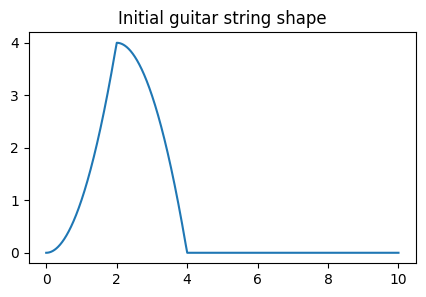

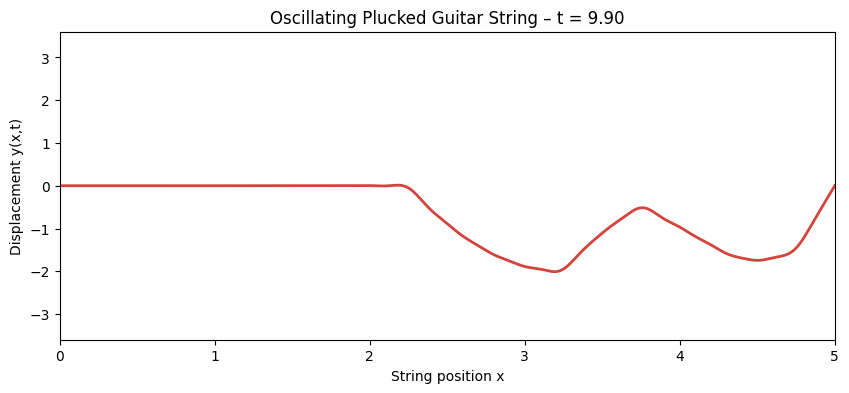

In [53]:
L = 10.0
a = 3.0
pluck_point = 2.0
samples = 10000

def initialStringShape(x):
    xprime = x
    if (xprime < 0.0):
        return -1 * initialStringShape(-xprime)
    if (xprime <= pluck_point):
        return float(a / pluck_point * xprime)
    else:
        return float(a - (xprime - pluck_point) * a / (L - pluck_point))

def initialStringShape(x):
    xprime = x
    if (xprime < 0.0):
        return -1 * initialStringShape(-xprime)
    if (xprime <= pluck_point):
        return float(xprime * xprime)
    else:
        return max(float(pluck_point * pluck_point - (xprime - pluck_point) * (xprime - pluck_point)), 0)

x_range = np.linspace(0, L, samples)
stringShapeVec = np.vectorize(initialStringShape)
y_values = stringShapeVec(x_range)

a_0 = getDC_Component(initialStringShape, T = 2 * L)
a_n_list = [getCosComponent(initialStringShape, n, T = 2 * L) for n in range(0, N_precompute+1)]
b_n_list = [getSineComponent(initialStringShape, n, T = 2 * L) for n in range(0, N_precompute+1)]

plt.figure(figsize=(5,3))
plt.title('Initial guitar string shape')
plt.plot(x_range, y_values)
plt.show()

from matplotlib.animation import FuncAnimation
from IPython.display import HTML  # Only needed in Jupyter

T = 10                  # Total animation time (in arbitrary units)
fps = 10
frames = int(T * fps)

# Convert lists to numpy arrays for speed
a_n = np.array(a_n_list)      # index 0 is unused or a_0 duplicate
b_n = np.array(b_n_list)

# Precompute frequencies
n_values = np.arange(0, N_precompute + 1)
omega_n = n_values * 2 * np.pi / T

# === Set up the figure ===
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_ylim(-a*1.2, a*1.2)
ax.set_xlim(0, L / 2)
ax.set_title("Oscillating Plucked Guitar String (Fourier Series)")
ax.set_xlabel("String position x")
ax.set_ylabel("Displacement y(x,t)")
line, = ax.plot([], [], lw=2, color='#d4443c')

def y_at_time(t):
    reconstruction = np.full_like(x_range, a_0)
    for n in range(1, len(a_n)):
        reconstruction += a_n[n] * np.cos(2 * np.pi * n * x_range / L) * np.cos(n * t)
        reconstruction += b_n[n] * np.sin(2 * np.pi * n * x_range / L) * np.cos(n * t)
    return reconstruction
        

def animate(frame):
    t = frame / fps
    y = y_at_time(t)
    line.set_data(x_range, y)
    ax.set_title(f"Oscillating Plucked Guitar String – t = {t:.2f}")
    return line,

# === Create animation ===
anim = FuncAnimation(fig, animate, frames=frames, interval=1000/fps, blit=True)

# Display in Jupyter
HTML(anim.to_jshtml())

For the simple function provided, you can verify this on the youtube video linked https://www.youtube.com/watch?v=_X72on6CSL0

Feel free to modify the initial string shape function to test what different outcomes you can get, keep in mind the ends need to intersect the x-axis and it needs to be anti-symmetric around the origin i.e. f(-x) = -f(x).